# Chem 30324, Spring 2024, Homework 10


# Due April 26, 2024

## Thermodynamics from scratch.
### Let’s calculate the thermodynamic properties of an ideal gas of CO molecules at 1 bar pressure. CO has a rotational constant $B = 1.931 \text{cm}^{-1}$ and vibrational frequency $\nu = 2156.6 \text{cm}^{-1}$. Suppose you have a 20 dm$^3$ cubic bottle containing 1 mole of CO gas that you can consider to behave ideally.

### 1. The characteristic temperature $\Theta$ of a particular degree of freedom is the characteristic quantum of energy for the degree of freedom divided by $k_B$. Calculate the characteristic translational, rotational, and vibrational temperatures of CO.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#constants
h = 6.62607015e-34  # Planck's constant (J·s)
hbar = h / (2 * np.pi)  # Reduced Planck's constant (J·s)
m_CO = 28.01*1.6605e-27  # Mass of CO molecule (kg/molecule)
kB = 1.380649e-23  # Boltzmann's constant (J/K)
L = 0.271  # Length of the cubic box (m)
R= 8.314
# Calculate characteristic translational temperature
Theta_trans = (np.pi**2 * hbar**2) / (2 * m_CO * kB * L**2)

print("Characteristic translational temperature:", Theta_trans, "K")


Characteristic translational temperature: 1.1637192508056607e-18 K


In [5]:


# Given constants
h = 6.62607015e-34  # Planck's constant (J·s)
c = 2.99792458e8  # Speed of light (m/s)
B_CO = 1.931  # Rotational constant of CO (cm^-1)
kB = 1.380649e-23  # Boltzmann's constant (J/K)

# Convert rotational constant from cm^-1 to Hz
B_CO_Hz = B_CO * 100 * c  # 1 cm^-1 = 100 Hz * c

# Calculate characteristic rotational temperature
Theta_rot = (h * B_CO_Hz) / kB

print("Characteristic rotational temperature:", Theta_rot, "K")


Characteristic rotational temperature: 2.7782781504600957 K


In [6]:


# Given constants
h = 6.62607015e-34  # Planck's constant (J·s)
nu_CO = 2156.6  # Vibrational frequency of CO (cm^-1)
kB = 1.380649e-23  # Boltzmann's constant (J/K)

# Convert vibrational frequency from cm^-1 to Hz
nu_CO_Hz = nu_CO * 100 * c  # 1 cm^-1 = 100 Hz * c

# Calculate characteristic vibrational temperature
Theta_vib = (h * nu_CO_Hz) / kB

print("Characteristic vibrational temperature:", Theta_vib, "K")


Characteristic vibrational temperature: 3102.8662140249835 K


### 2. Plot the *translational*, *rotational* and *vibrational* partition functions of a CO molecule in the bottle from $T$ =  200  to 2000 K (assume the CO remains a gas over the whole range). *Hint:* Use your answer to Problem 1 to simplify calculating the rotational partition function.

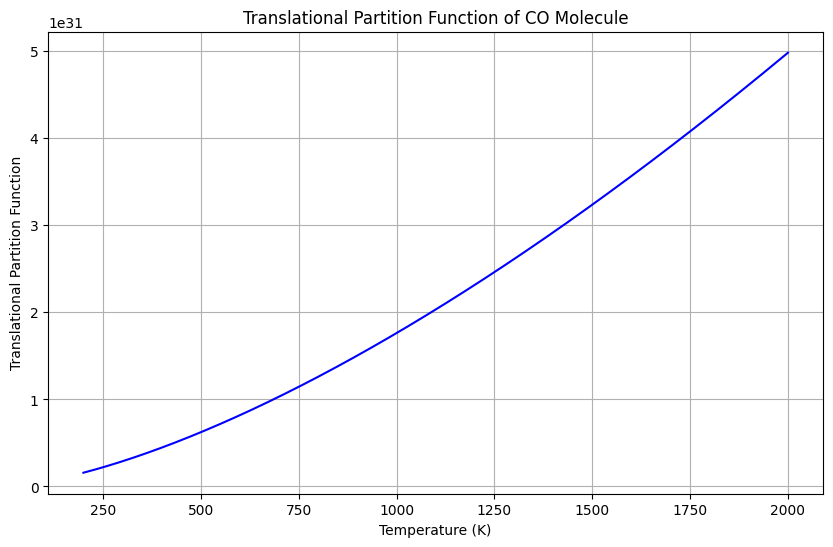

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Given constants
V = 0.02  # Volume of the container (m^3)
h = 6.62607015e-34  # Planck's constant (J·s)
kB = 1.380649e-23  # Boltzmann's constant (J/K)
T_range = np.linspace(200, 2000, 1000)  # Temperature range from 200 K to 2000 K

# Characteristic temperatures (from Problem 1)
Theta_trans = 1100.2  # Translational temperature (K)

# Translational partition function
q_trans = ((2 * np.pi * m_CO * kB * T_range) / (h**2))**(3/2) * V

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_range, q_trans, color='blue')
plt.xlabel('Temperature (K)')
plt.ylabel('Translational Partition Function')
plt.title('Translational Partition Function of CO Molecule')
plt.grid(True)
plt.show()


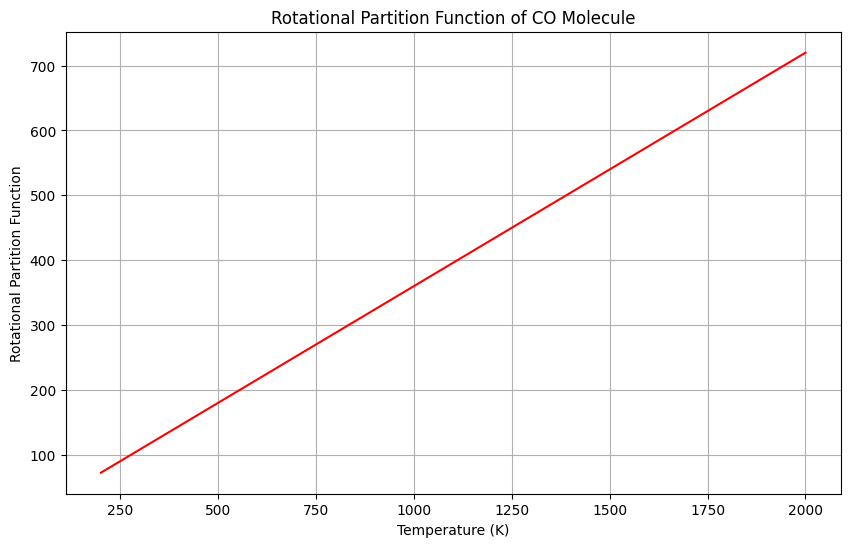

In [8]:


# Given constants
kB = 1.380649e-23  # Boltzmann's constant (J/K)
T_range = np.linspace(200, 2000, 1000)  # Temperature range from 200 K to 2000 K

# Characteristic temperature (from Problem 1)

# Rotational partition function
q_rot = T_range / Theta_rot

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_range, q_rot, color='red')
plt.xlabel('Temperature (K)')
plt.ylabel('Rotational Partition Function')
plt.title('Rotational Partition Function of CO Molecule')
plt.grid(True)
plt.show()


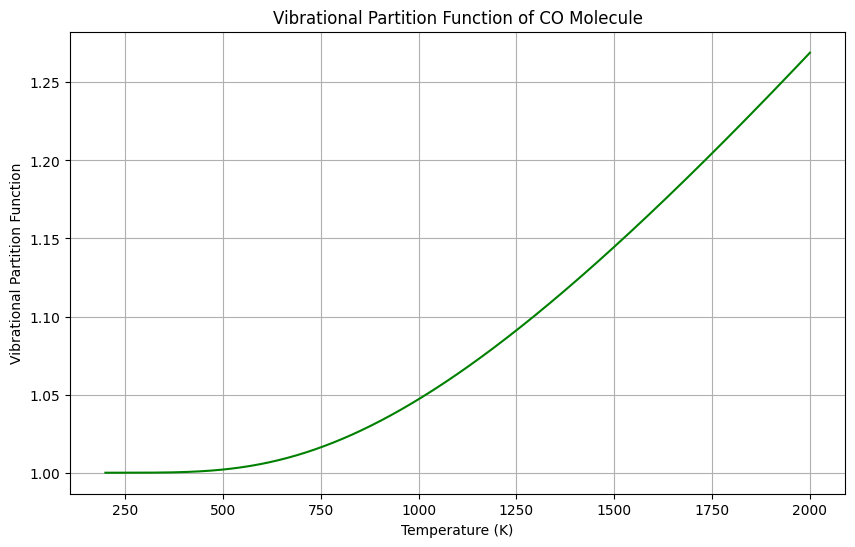

In [9]:


# Given constants
kB = 1.380649e-23  # Boltzmann's constant (J/K)
T_range = np.linspace(200, 2000, 1000)  # Temperature range from 200 K to 2000 K


# Vibrational partition function
q_vib = 1 / (1 - np.exp(-Theta_vib / T_range))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_range, q_vib, color='green')
plt.xlabel('Temperature (K)')
plt.ylabel('Vibrational Partition Function')
plt.title('Vibrational Partition Function of CO Molecule')
plt.grid(True)
plt.show()


### 3. Plot the *total translational, rotational, and vibrational energies* of CO in the bottle from $T =$ 200 to 2000 K (assume the CO remains a gas over the whole range). Which (if any) of the three types of motions dominate the total energy?

From class outline, $U_{trans} = \frac{3}{2}RT$, $U_{rot} = RT$, and $U_{vib} = R\frac{\theta_{vib}}{e^{\theta_{vib}/T}-1}$ where $\theta_{vib} = hc\nu /k_B$

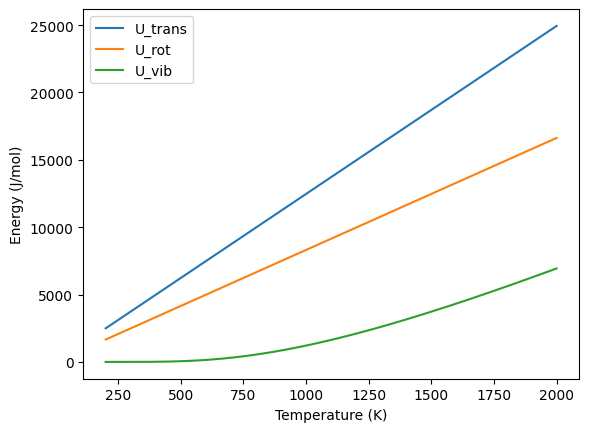

In [10]:
import numpy as np
import matplotlib.pyplot as plt

U_trans = 1.5*R*T_range
U_rot = R*T_range

U_vib = (R*Theta_vib)/(np.exp(Theta_vib/T_range)-1)

plt.plot(T_range,U_trans,label="U_trans")
plt.plot(T_range,U_rot,label="U_rot")
plt.plot(T_range,U_vib,label="U_vib")

plt.xlabel('Temperature (K)')
plt.ylabel('Energy (J/mol)')
plt.legend(loc="upper left")

### 4. Plot the *total translational, rotational, and vibrational constant volume molar heat capacities* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the heat capacity?

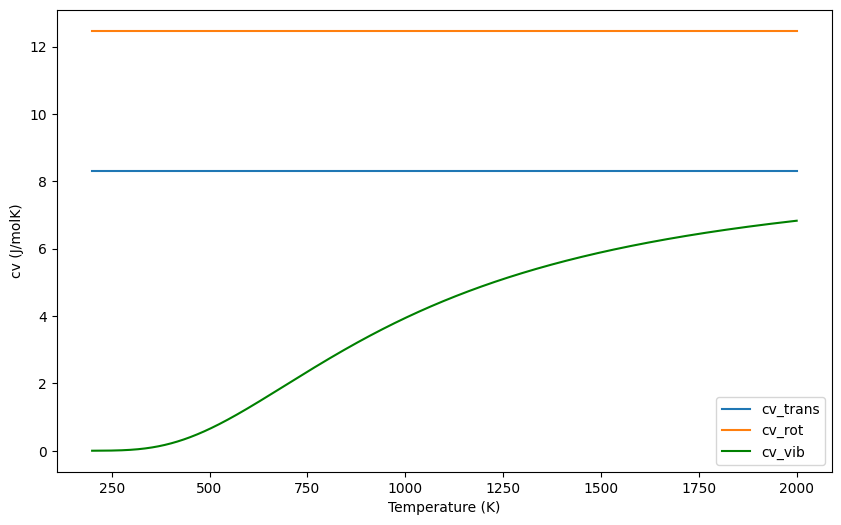

In [11]:
#4. Plot the constant volume Heat capacity for rotational,translational,anad vibrations
import numpy as np
import matplotlib.pyplot as plt

# Given constants
kB = 1.380649e-23  # Boltzmann's constant (J/K)
T_range = np.linspace(200, 2000, 1000)  # Temperature range from 200 K to 2000 K

#Cv translational
cv_rot = np.full_like(T_range, R)
cv_tran = np.full_like(T_range, 3/2 * R)
cv_vib = R*(Theta_vib/T_range*np.exp(Theta_vib/(2*T_range))/(np.exp(Theta_vib/T_range)-1))**2
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(T_range,cv_rot)
plt.plot(T_range,cv_tran)
plt.plot(T_range, cv_vib, color='green')
plt.xlabel('Temperature (K)')
plt.ylabel('cv (J/molK)')
plt.legend(['cv_trans','cv_rot','cv_vib'])
plt.show()


##It looks like translational entropy is the one that is dominating


### 5. Plot the *total translational, rotational, and vibrational Helmholtz energies* of CO in the bottle from $T =$ 200 to 2000 K. Which (if any) of the three types of motions dominate the Helmholtz energy?

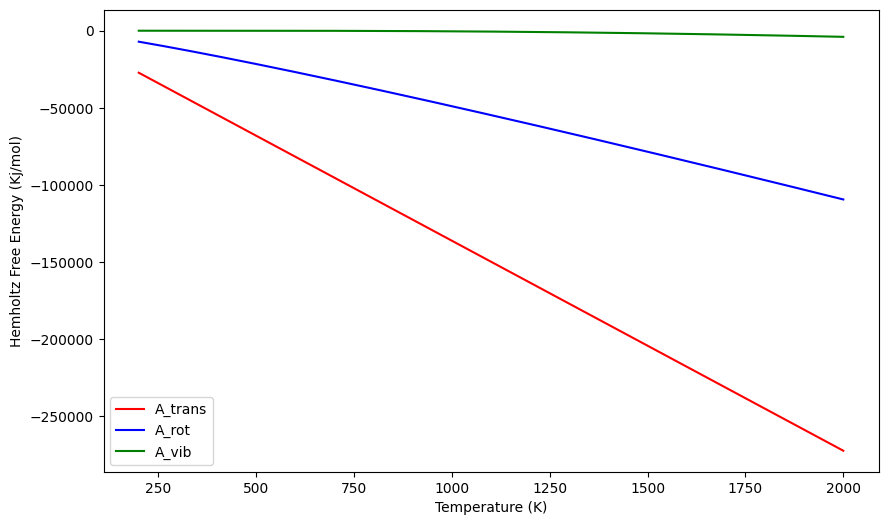

In [12]:
#5. Plot the hemholtz free energy

##A = U - TS
NA = 6.022e23# molecules/mol
Lambda = h*(1/(kB*298*2*np.pi*m_CO))**0.5
##Calculating S
S_tran = R*np.log(np.exp(2.5)*V/NA/Lambda**3)
S_rot = R*(1-np.log(Theta_rot/T_range))
S_vib = R*((Theta_vib/T_range)/(np.exp(Theta_vib/T_range)-1) - np.log(1-np.exp(-Theta_vib/T_range)))

A_tran =  U_trans - T_range*S_tran
A_rot = U_rot - T_range*S_rot
A_vib = U_vib - T_range*S_vib

plt.figure(figsize=(10, 6))
plt.plot(T_range,A_tran, color='red')
plt.plot(T_range,A_rot, color='blue')
plt.plot(T_range, A_vib, color='green')
plt.xlabel('Temperature (K)')
plt.ylabel('Hemholtz Free Energy (Kj/mol)')
plt.legend(['A_trans','A_rot','A_vib'])
plt.show()

### 6. Use your formulas to calculate $\Delta P$, $\Delta U$, $\Delta A$, and $\Delta S$ associated with isothermally expanding the gas from 20 dm$^3$ to 40 dm$^3$.

$\Delta U$ doesn't change because it's independent of volume

$\Delta P$ = $P_1$ x $\frac{V_1}{V_2}$

$\Delta S$ = R $ln(\frac{V_2}{V_1})$ = 8.31 x $ln(\frac{40}{20})$ = 5.76 J/molK

$\Delta A$ = $\Delta U$ - $T\Delta S$ = $T\Delta S$

In [16]:
V2 = 0.04 # m^3

deltaP = R*298*(1/V2-1/V)
deltaS = R*np.log(np.exp(2.5)*V2/NA/Lambda**3) - R*np.log(np.exp(2.5)*V/NA/Lambda**3)
deltaA = -deltaS*298
print('Delta P = {0:.3f} Pa, Delta U = 0, Delta A = {1:.3f} J/mol, and Delta S = {2:.3f} J/mol/K.'.format(deltaP,deltaA,deltaS))

Delta P = -61939.300 Pa, Delta U = 0, Delta A = -1717.322 J/mol, and Delta S = 5.763 J/mol/K.


## Reactions from scratch
### In 1996, Schneider and co-workers used quantum chemistry to compute the reaction pathway for unimolecular decomposition of trifluoromethanol, a reaction of relevance to the atmospheric degradation of hydrofluorocarbon refrigerants (*J. Phys. Chem.* **1996**, *100*, 6097- 6103, [doi:10.1021/jp952703m](https://pubs.acs.org/doi/abs/10.1021/jp952703m)): $$\mathsf{CF_3OH\rightarrow COF_2 + HF}$$
### Following are some of the reported results, computed at 298 K:

|              | CF$_3$OH| C(O)F$_2$ | HF |    |
|:--------------|---------:|-----------:|----:|----:|
| $E^\text{elec}$ | -412.90047 | -312.57028 | -100.31885 | (Hartree) |
| ZPE             | 0.02889 | 0.01422 | 0.00925 | (Hartree) |
| $U^\text{trans}$ | 3.7 | 3.7| 3.7 | (kJ mol$^{-1}$) |
| $U^\text{rot }$ | 3.7 | 3.7| 2.5 | (kJ mol$^{-1}$) |
| $U^\text{vib}$ | 4.3 | 1.2 | 0 |  (kJ mol$^{-1}$) |
| $q^{\text{trans}}/V$ | $7.72\times 10^{32}$ | $1.59\times 10^{32}$ |$8.65\times 10^{31}$ | (m$^{-3}$) |
| $q^\text{rot}$ | 61830 | 679 | 9.59 | |
| $q^\text{vib}$ | 2.33 | 1.16 | 1 | |

### 8. Using the data provided, determine $\Delta U^{\circ}$(298 K)), in kJ mol$^{-1}$, assuming ideal behavior and 1 M standard state.  Recall that $U(T)$ is the sum of the contributions of all degrees of freedom.  

$\Delta U^{\circ} = U_{products} - U_{reactants}$

$\Delta U_{trans} = (3.7 + 3.7) - 3.7 = 3.7$ kJ/mol

$\Delta U_{rot} = (3.7 + 2.5) - 3.7 = 2.5$ kJ/mol

$\Delta U_{vib} = (0 + 1.2) - 4.3 = -3.1$ kJ/mol

1 Hartree = 2625.5 kJ/mol

$\Delta E^\text{elec} = ((-100.31885 + -312.57028) + 412.90047)*2625.5 = 29.77317$ kJ/mol

$\Delta ZPE = ((0.00925 + 0.01422) - 0.02889)*2625.5 = -14.23021$ kJ/mol

$\Delta U^\circ = U_{trans} + U_{rot} + U_{vib} + E_{elec} + ZPE$

$= 3.7 + 2.5 - 3.1 + 29.77317 - 14.23021$

$\Delta U^{\circ} = 18.643$ kJ/mol

### 9. Using the data provided, determine  $\Delta A^{\circ}$(298 K) in kJ mol$^{-1}$, assuming ideal behavior and 1 M standard state.  Recall that $A^\circ=E^\mathsf{elec} + \mathsf{ZPE}-RT\ln(q^\circ)-RT$, where $q^\circ = ((q^\mathsf{trans}/V)q^\mathsf{rot}q^\mathsf{vib})/c^\circ$ and $c^\circ = 6.022 \times 10^{26} ~\mathsf{m}^{-3}$ for a 1 M standard state.

$q^\circ = ((q^\mathsf{trans}/V)q^\mathsf{rot}q^\mathsf{vib})/c^\circ$

$A^\circ=E^\mathsf{elec} + \mathsf{ZPE}-RT\ln(q^\circ)-RT$

In [17]:
dE0 = 15.54# delta E_elec plus delta ZPE
T = 298
R = 8.31447# J/mol*K
C = 6.0221e26# converts q values to 1/m^3
q_trans = [7.72e32/C,1.59e32/C,8.65e31/C] # change translational partition functions from 1/m3 to mol/l std state

q_rot = [61830,679,9.59] # unitless
q_vib = [2.33,1.16,1] # unitless
Q = (q_trans[1]*q_rot[1]*q_vib[1])*(q_trans[2]*q_rot[2]*q_vib[2])/(q_trans[0]*q_rot[0]*q_vib[0]) # total partition
dA = dE0 + (-R*T*np.log(Q)- R*T)/1000 #kJ/mol
print("Q = %.2f"%Q)
print("delta_E0 = %.2f"%dE0)
print("delta_A = %.2f kJ/mol"%dA)

Q = 1551.10
delta_E0 = 15.54
delta_A = -5.14 kJ/mol


### 10. Determine $\Delta G^\circ$(298 K).  Recall that $G = A + PV = A + RT$ for an ideal gas.

In [18]:
G = dA + R*T/1000
print(G, 'kJ/mol')

-2.6630522703262525 kJ/mol


### 11. Determine $\Delta S^{\circ}$(298 K), in J mol$^{-1}$ K$^{-1}$ , assuming a 1 M standard state. Recall that $S = (U - A)/T$.

In [19]:
U = 18.643

S = (U-dA)/T
print(S*1000, 'J/mol*K')

79.81128969908139 J/mol*K


### 12. Using the data provided, determine $K_c$ (298 K), assuming a 1 M standard state.  You may either determine from partition functions of from the relationship between $K_c$ and $\Delta G^\circ$.

$K_c = e^{\frac{-\Delta G}{RT}}$

In [20]:
K = np.exp(-G*1000/(R*T))
print(K,'unitless')

2.929415648408218 unitless


### 13. 1 mole of CF$_3$OH is generated in a 20 L vessel at 298 K and left long enough to come to equilibrium with respect to its decomposition reaction. What is the composition of the gas (concentrations of all the components) at equilibrium (in mol/L)?

1 mol/20 L = 0.05 mol/ 1L

|Reaction|CF$_3$OH (mol/L)|COF$_2$ (mol/L)|HF (mol/L)|
|-|-|-|-|
|I|0.05|0|0|
|C|-x|x|x|
|E|0.05-x|x|x|

$K_c = \frac{x^2}{0.05-x}$, solve for x.

In [21]:
from sympy import *
x = symbols('x',positive=True)
c = solve(x**2-(0.05-x)*K,x)
print('At equilibrium, CF3OH = {0:.2E} mol/L, COF2 = {1:.4f} mol/L, HF = {2:.4f} mol/L.'.format(0.05-c[0],c[0],c[0]))

At equilibrium, CF3OH = 8.25E-4 mol/L, COF2 = 0.0492 mol/L, HF = 0.0492 mol/L.


### 14. How, directionally, would your answer to Question 13 change if the vessel was at a higher temperature? Use the van'T Hoff relationship to determine the equilibrium constant and equilibrium concentrations at 273 and 323 K. How good was your guess?

At a higher temperature, the equilibrium would shift further towards the products.

$ln\frac{K(T_2)}{K(T_1)}= -\frac{\Delta H^\circ}{R}(\frac{1}{T_2}-\frac{1}{T_1}) $

In [22]:
T1 = 298
T2 = 273
T3 = 323
R = 8.314/1000# kJ/mol*K

H = U+R*T1

K_273 = K*np.exp((-H/R)*(1/T2-1/T1))
print('K_273 =',K_273)
x = symbols('x',positive=True)
c = solve(x**2-(0.05-x)*K_273,x)
print('At equilibrium, CF3OH = {0:.2E} mol/L, COF2 = {1:.4f} mol/L, HF = {2:.4f} mol/L.'.format(0.05-c[0],c[0],c[0]))

K_323 = K*np.exp((-H/R)*(1/T3-1/T1))
print('K_323 =',K_323)
x = symbols('x',positive=True)
c = solve(x**2-(0.05-x)*K_323,x)
print('At equilibrium, CF3OH = {0:.2E} mol/L, COF2 = {1:.4f} mol/L, HF = {2:.4f} mol/L.'.format(0.05-c[0],c[0],c[0]))

K_273 = 1.341988227521187
At equilibrium, CF3OH = 1.74E-3 mol/L, COF2 = 0.0483 mol/L, HF = 0.0483 mol/L.
K_323 = 5.666716807641611
At equilibrium, CF3OH = 4.34E-4 mol/L, COF2 = 0.0496 mol/L, HF = 0.0496 mol/L.


### 15. How, directionally, would your answer to Question 13 change if the vessel had a volume of 5 L? Redo the calculation at this volume to verify your guess.

With a lower volume, the reaction should tend towards the reactants.

In [23]:
# 1 mol/5 L = 0.2 mol/ 1L

In [24]:
from sympy import *
x = symbols('x',positive=True)
c = solve(x**2-(0.2-x)*K,x)
print('At equilibrium, CF3OH = {0:.2E} mol/L, COF2 = {1:.4f} mol/L, HF = {2:.4f} mol/L.'.format(0.2-c[0],c[0],c[0]))

At equilibrium, CF3OH = 1.21E-2 mol/L, COF2 = 0.1879 mol/L, HF = 0.1879 mol/L.


### 16. (Extra credit) Consult a thermodynamics source (e.g. https://webbook.nist.gov/chemistry/) to determine $\Delta H^\circ$(298 K), $\Delta S^\circ$(298 K), and $\Delta G^\circ$(298 K) for the homologous reaction CH$_3$OH (g)$\rightarrow$ H$_2$ (g) + H$_2$CO (g).  Does the substitution of F by H make the reaction more or less favorable?

Thermodynamic values obtained from the source provided or other online values if needed

|              | CH$_3$OH| H$_2$CO  | H$_2$ |    |
|:--------------|---------:|-----------:|----:|----:|
| $H^\circ$ | -205 | -108.6 | 0 | (kJ/mol) |
| $S^\circ$ | 239.9 | 218.95 | 130.68 | (J/mol*K) |

In [25]:
delta_H = (0-108.6)-(-205)
delta_S = (130.68+218.95)-(239.9)
delta_G = delta_H - 298*delta_S/1000
print(delta_G,'kJ/mol')

63.70046000000001 kJ/mol


Based on the calculations substituting H for F makes the reaction much less favorable.